## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Pandas - Date & Time

In [2]:
# 주가 데이터 가져오기
df = pd.read_csv("./all_stocks_2006-01-01_to_2018-01-01.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [3]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [4]:
# 종목별 종가
df = pd.pivot(data=df, index='Date', columns='Name', values='Close')
df.head()

Name,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,40.91,10.68,47.58,52.58,70.44,57.80,17.45,59.08,24.40,35.37,...,26.84,10.74,23.78,58.78,45.99,61.73,56.53,30.38,46.23,58.47
2006-01-04,40.97,10.71,47.25,51.95,71.17,59.27,17.85,58.91,23.99,35.32,...,26.97,10.69,24.55,58.89,46.50,61.88,56.19,31.27,46.32,58.57
2006-01-05,41.53,10.63,47.65,52.50,70.33,59.27,18.35,58.19,24.41,35.23,...,26.99,10.76,24.58,58.70,46.95,61.69,55.98,31.63,45.69,58.28
2006-01-06,43.21,10.90,47.87,52.68,69.35,60.45,18.77,59.25,24.74,35.47,...,26.91,10.72,24.85,58.64,47.21,62.90,56.16,31.35,45.88,59.43
2006-01-09,43.42,10.86,47.08,53.99,68.77,61.55,19.06,58.95,25.00,35.38,...,26.86,10.88,24.85,59.08,47.23,61.40,56.80,31.48,45.71,59.40


In [5]:
# 애플, 아마존 선택
df = df[['AAPL', 'AMZN']]
df.head()

Name,AAPL,AMZN
Date,,
2006-01-03,10.68,47.58
2006-01-04,10.71,47.25
2006-01-05,10.63,47.65
2006-01-06,10.90,47.87
2006-01-09,10.86,47.08


In [6]:
# 인덱스 초기화
df = df.reset_index()
# 인덱스를 초기화 한 것에 대해 컬럼으로 들어오게 된다.
#앞에서 다섯줄
df.head()

Name,Date,AAPL,AMZN
0,2006-01-03,10.68,47.58
1,2006-01-04,10.71,47.25
2,2006-01-05,10.63,47.65
3,2006-01-06,10.90,47.87
4,2006-01-09,10.86,47.08


In [7]:
# 뒷부분의 자료를 보고 싶다면 tail
df.tail()

Name,Date,AAPL,AMZN
3015,2017-12-22,175.01,1168.36
3016,2017-12-26,170.57,1176.76
3017,2017-12-27,170.60,1182.26
3018,2017-12-28,171.08,1186.10
3019,2017-12-29,169.23,1169.47


In [8]:
# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   AAPL    3019 non-null   float64
 2   AMZN    3019 non-null   float64
dtypes: float64(2), object(1)
memory usage: 70.9+ KB


In [9]:
# 문자열 -> datetime 자료형
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3020 non-null   datetime64[ns]
 1   AAPL    3019 non-null   float64       
 2   AMZN    3019 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 70.9 KB


In [10]:
# 날짜 인덱스 변환
df = df.set_index('Date')
df.head()

Name,AAPL,AMZN
Date,,
2006-01-03,10.68,47.58
2006-01-04,10.71,47.25
2006-01-05,10.63,47.65
2006-01-06,10.90,47.87
2006-01-09,10.86,47.08


<AxesSubplot:xlabel='Date'>

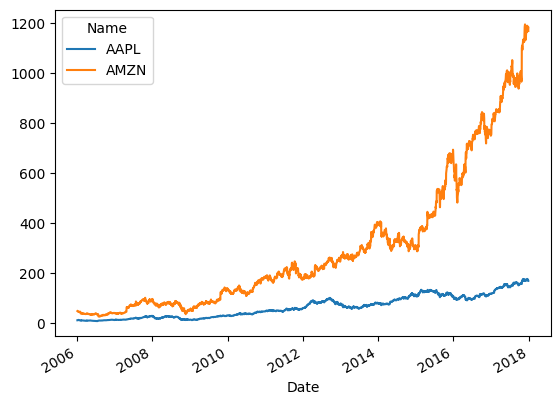

In [11]:
# pandas plot
df.plot()

### Timestamp

In [12]:
# timestamp 
ts = pd.Timestamp("2022-03-25 07:23:59")
ts

Timestamp('2022-03-25 07:23:59')

In [13]:
# timestamp 속성
print("year:", ts.year)#연도
print("month:", ts.month)#월
print("quarter:", ts.quarter)#분기
print("day:", ts.day)#일
print("weekofyear:", ts.weekofyear)# 1년 중 몇번째 주
print("dayofyear:", ts.dayofyear)# 1년 중 몇번째 날
print("dayofweek:", ts.dayofweek)#주의 몇번째 날
print("weekday:", ts.weekday())
print("hour:", ts.hour)
print("minute:", ts.minute)
print("second:", ts.second)

year: 2022
month: 3
quarter: 1
day: 25
weekofyear: 12
dayofyear: 84
dayofweek: 4
weekday: 4
hour: 7
minute: 23
second: 59


### date range  
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [14]:
date_ids = pd.date_range(start="2020-01-01", end="2021-06-30", freq="M")
date_ids

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [15]:
#2주간격
date_ids = pd.date_range(start="2020-01-01", end="2021-06-30", freq="2M")
date_ids

DatetimeIndex(['2020-01-31', '2020-03-31', '2020-05-31', '2020-07-31',
               '2020-09-30', '2020-11-30', '2021-01-31', '2021-03-31',
               '2021-05-31'],
              dtype='datetime64[ns]', freq='2M')

In [16]:
date_ids[0]

Timestamp('2020-01-31 00:00:00', freq='2M')

### time delta

In [17]:
#시간의 차이 5번째 일에서 0번째일을 빼자
days = date_ids[5] - date_ids[0]
days

Timedelta('304 days 00:00:00')

In [18]:
#days의 날짜만 뽑자
days.days

304

In [19]:
#days의 시간만 뽑자
pd.Timedelta(days=1)

Timedelta('1 days 00:00:00')

### (DateTimeIndex) Slicing

In [20]:
# 시간 기준으로 Slicing 할 수 있다.
df.head()

Name,AAPL,AMZN
Date,,
2006-01-03,10.68,47.58
2006-01-04,10.71,47.25
2006-01-05,10.63,47.65
2006-01-06,10.90,47.87
2006-01-09,10.86,47.08


In [21]:
#해당 범위값만 추출하고 싶다고 할 때 쓸 수 있다.
df['2006-03':'2006-05']

Name,AAPL,AMZN
Date,,
2006-03-01,9.87,37.12
2006-03-02,9.94,36.88
2006-03-03,9.67,37.21
2006-03-06,9.35,36.86
2006-03-07,9.47,36.93
...,...,...
2006-05-24,9.05,35.19
2006-05-25,9.19,35.63
2006-05-26,9.08,36.07


In [22]:
df['2006':'2007']

Name,AAPL,AMZN
Date,,
2006-01-03,10.68,47.58
2006-01-04,10.71,47.25
2006-01-05,10.63,47.65
2006-01-06,10.90,47.87
2006-01-09,10.86,47.08
...,...,...
2007-12-24,28.40,91.01
2007-12-26,28.42,92.85
2007-12-27,28.37,94.25


# 결측값 처리

In [23]:
# 결측값 생성
apple = df[['AAPL']]

np.random.seed(20)
apple.iloc[np.random.randint(len(df), size=300), 0] = np.nan
apple.isnull().sum()

Name
AAPL    289
dtype: int64

### mean / median

In [24]:
apple_mean = apple.copy()
#결측치를 채워주는 함수
#나머지 날짜들의 평균값들을 이용해서 결측치를 채워준다.
apple_mean['AAPL'] = apple_mean['AAPL'].fillna(apple_mean['AAPL'].mean())
apple_mean.isnull().sum()

Name
AAPL    0
dtype: int64

In [25]:
apple_median = apple.copy()
apple_median['AAPL'] = apple_median['AAPL'].fillna(apple_median['AAPL'].median())
apple_median.isnull().sum()

Name
AAPL    0
dtype: int64

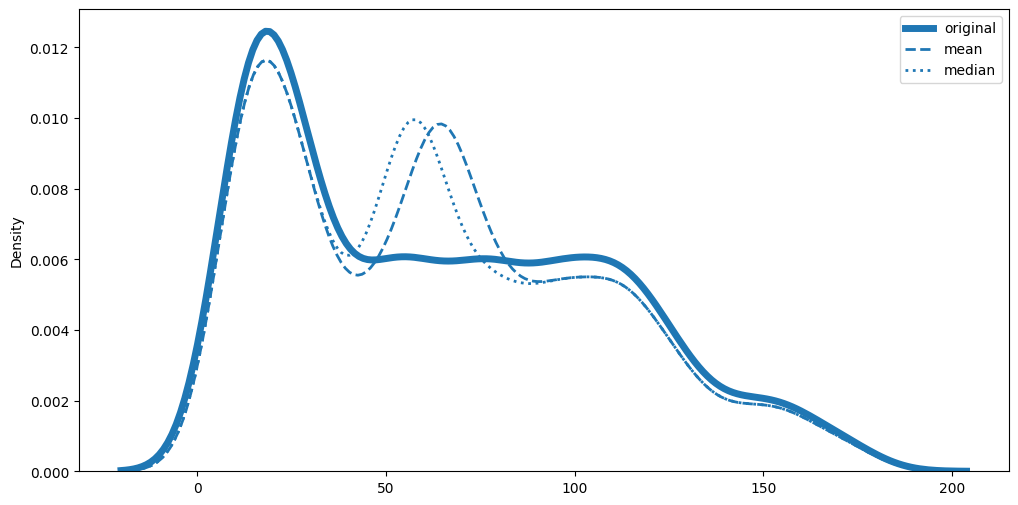

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=apple, linewidth=5, ax=ax, label="original")
sns.kdeplot(data=apple_mean, linewidth=2, linestyle='--', ax=ax, label="mean")
sns.kdeplot(data=apple_median, linewidth=2, linestyle=':', ax=ax, label="median")
plt.legend()
plt.show()

### ffill / bfill

In [27]:
test = pd.Series([1, 2, 3, np.nan, 4, 5])
test

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [28]:
test.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [29]:
test.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    5.0
dtype: float64

In [30]:
apple_ffill = apple.copy()
apple_ffill['AAPL'] = apple_ffill['AAPL'].fillna(method='ffill')
apple_ffill.isnull().sum()

Name
AAPL    0
dtype: int64

In [31]:
apple_bfill = apple.copy()
apple_bfill['AAPL'] = apple_bfill['AAPL'].fillna(method='bfill')
apple_bfill.isnull().sum()

Name
AAPL    0
dtype: int64

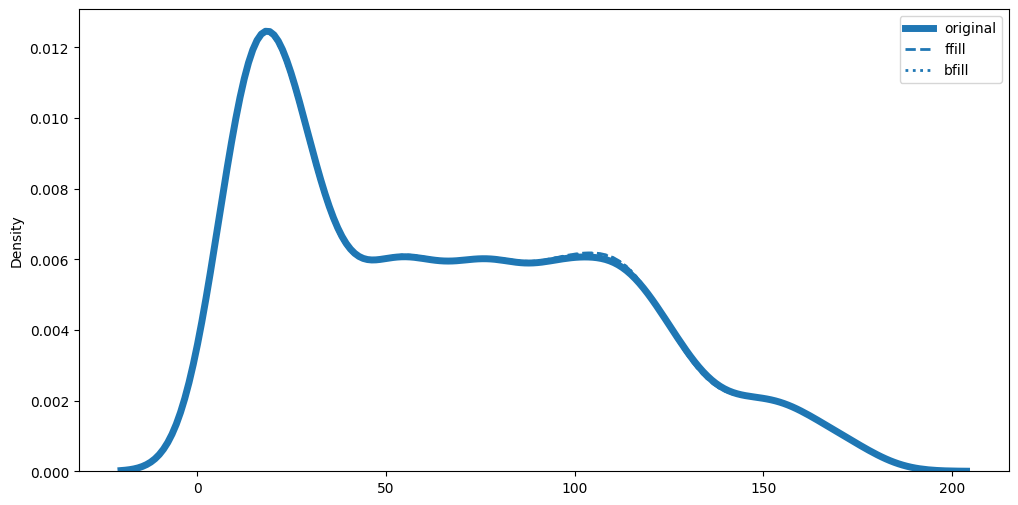

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=apple, linewidth=5, ax=ax, label="original")
sns.kdeplot(data=apple_ffill, linewidth=2, linestyle='--', ax=ax, label="ffill")
sns.kdeplot(data=apple_bfill, linewidth=2, linestyle=':', ax=ax, label="bfill")
plt.legend()
plt.show()

### interpolate

In [33]:
# 1-5까지 중 4개를 결측으로 채워놓았다.
test = pd.Series([1, np.nan, np.nan, np.nan, np.nan, 5])
test

0    1.0
1    NaN
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [34]:
test.interpolate(method='linear')
# linear 선형추론

0    1.0
1    1.8
2    2.6
3    3.4
4    4.2
5    5.0
dtype: float64

In [35]:
test.interpolate(method='nearest')

0    1.0
1    1.0
2    1.0
3    5.0
4    5.0
5    5.0
dtype: float64

In [36]:
apple_linear = apple.copy()
apple_linear['AAPL'] = apple_linear['AAPL'].interpolate(method='linear')
apple_linear.isnull().sum()

Name
AAPL    0
dtype: int64

In [37]:
apple_nearest = apple.copy()
apple_nearest['AAPL'] = apple_nearest['AAPL'].interpolate(method='nearest')
apple_nearest.isnull().sum()

Name
AAPL    0
dtype: int64

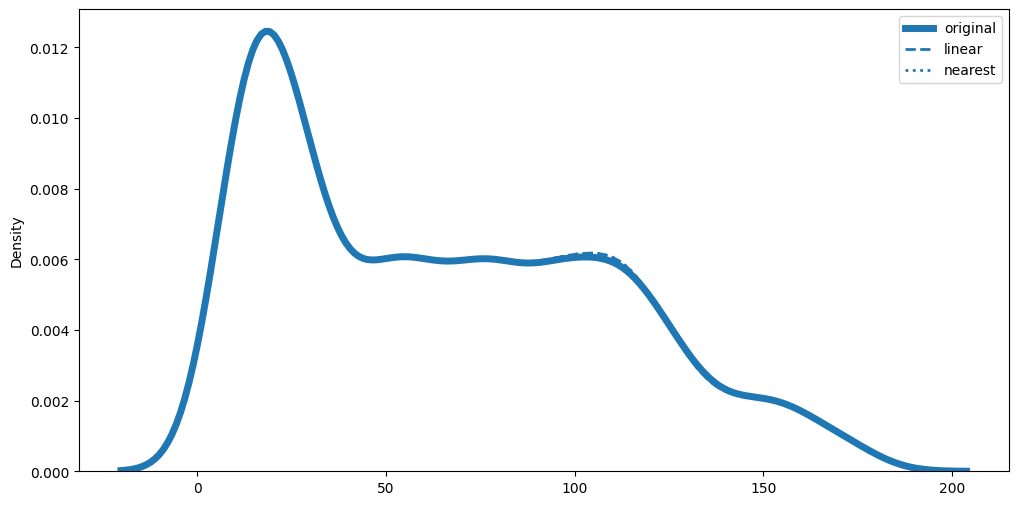

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=apple, linewidth=5, ax=ax, label="original")
sns.kdeplot(data=apple_linear, linewidth=2, linestyle='--', ax=ax, label="linear")
sns.kdeplot(data=apple_nearest, linewidth=2, linestyle=':', ax=ax, label="nearest")
plt.legend()
plt.show()

### ML 모델

In [39]:
from sklearn.impute import KNNImputer

apple_knn = apple.copy()

for k in [3, 5, 7]:
    imp = KNNImputer(n_neighbors=k)
    apple_knn[f"k={k}"] = imp.fit_transform(apple_knn["AAPL"].values.reshape(-1,1))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=apple, linewidth=5, ax=ax, label="original")
sns.kdeplot(data=apple_knn['k=3'], linewidth=2, linestyle='--', ax=ax, label="k=3")
sns.kdeplot(data=apple_knn['k=5'], linewidth=2, linestyle=':', ax=ax, label="k=5")
sns.kdeplot(data=apple_knn['k=7'], linewidth=2, linestyle='-.', ax=ax, label="k=7")
plt.legend()
plt.show()

# lag

In [ ]:
apple_linear['AAPL'].shift(1)
# 직전시점의 데이터

In [ ]:
apple_linear['AAPL'].shift(-2)

In [ ]:
apple_lags = apple_linear.copy()
apple_lags['lag_1'] = apple_lags['AAPL'].shift(1)
apple_lags['lag_2'] = apple_lags['AAPL'].shift(2)
apple_lags

In [ ]:
apple_lags['diff_lag_1'] = apple_lags['AAPL'] - apple_lags['lag_1']
apple_lags

In [ ]:
apple_lags.plot(figsize=(12, 8), subplots=True)

In [ ]:
apple_lags['diff_lag_1'].plot()

In [ ]:
# diff 함수

apple_lags['AAPL'].diff(1).plot()

In [ ]:
# percent change
apple_lags['AAPL'].pct_change().plot()

# Resampling

### asfreq 

In [ ]:
apple_linear

In [ ]:
apple_linear.asfreq('D')

In [ ]:
apple_linear.asfreq('10d')

### resample

In [ ]:
apple_linear.resample('D')

In [ ]:
apple_linear.resample('D').mean()

In [ ]:
apple_linear.resample('10d').mean()

In [ ]:
apple_linear.resample('10d').max()

In [ ]:
apple_linear.resample('10d').first()

In [ ]:
apple_linear.resample('M').agg(['min', 'max', 'mean', 'std'])

In [ ]:
# 평활화 (smoothing)
monthly_apple = apple_linear.resample("M")["AAPL"].mean()
quarterly_apple = apple_linear.resample("Q")["AAPL"].mean()
yearly_apple = apple_linear.resample("Y")["AAPL"].mean()

plt.figure(figsize=(14, 5))
apple_linear['AAPL'].plot(label='original')
monthly_apple.plot(label='monthly')
quarterly_apple.plot(label='quarterly')
yearly_apple.plot(label='yearly')
plt.legend()

# div 비교

In [ ]:
df.head()

In [ ]:
df.plot(figsize=(15, 4))

In [ ]:
df_div = df.div(df.iloc[0])
df_div.head()

In [ ]:
df_div.plot(figsize=(15, 4))

# rolling window

In [ ]:
df.rolling(window=5)

In [ ]:
df.rolling(window=5).mean()

In [ ]:
moving_average_day5 = df.rolling(window=5).mean()
moving_average_day120 = df.rolling(window=120).mean()

plt.figure(figsize=(14, 5))
apple_linear['AAPL'].plot(label='original')
moving_average_day5['AAPL'].plot(label='ma_5d')
moving_average_day120['AAPL'].plot(label='ma_120d')
plt.legend()

# expanding window

In [ ]:
# 누적 합계 - expanding
df["AAPL"].expanding(min_periods=1).sum()  # min_periods : 초기 윈도우 크기 설정

In [ ]:
df["AAPL"].cumsum()

In [ ]:
# 누적 최솟값
df["AAPL"].expanding(min_periods=1).min() 

In [ ]:
df["AAPL"].cummin()

In [ ]:
# 누적 최댓값
df["AAPL"].expanding(min_periods=1).max() 

In [ ]:
df["AAPL"].cummax()

In [ ]:
# 시각화 
plt.figure(figsize=(14, 5))
df['AAPL'].plot(label='original')
df["AAPL"].cummax().plot(label='max')
df["AAPL"].cummin().plot(label='min')
plt.legend()